## test to locate to a random polygon of data through different partition 

1. 


In [1]:
from shapely.geometry import Point, Polygon, MultiPolygon, LineString, box

def geometry_to_1d_tile_indices(geometry):
    # Convert different geometry types to bounding box
    if isinstance(geometry, Point):
        bbox = geometry.buffer(1e-10)  # Buffer by 1 degree for points
    elif isinstance(geometry, LineString):
        bbox = geometry.buffer(1e-10)  # Buffer by 1 degree for lines
    elif isinstance(geometry, (Polygon, MultiPolygon)):
        bbox = geometry  # Bounding box for polygons and multipolygons
    else:
        raise ValueError("Unsupported geometry type")

    # Extract bounding box coordinates
    xmin, ymin, xmax, ymax = bbox.bounds
    lon_indices = range(int(xmin), int(xmax)+1)
    lat_indices = range(int(ymin), int(ymax)+1)
    grid_cells = []
    for lat_indice in lat_indices:
        for lon_indice in lon_indices:
            grid_cells.append(box(lon_indice,lat_indice,lon_indice+1,lat_indice+1))
    print(grid_cells)
    overlapping_cells = [cell for cell in grid_cells if bbox.intersects(cell)]
    tiles = []
    for tile in overlapping_cells:
        x = tile.bounds[0]
        lon = f'{str(int(x)).zfill(3)}E' if x>=0 else f'{str(-int(x)).zfill(3)}W'
        y = tile.bounds[1]
        lat = f'{str(int(y)).zfill(2)}N' if x>=0 else f'{str(-int(y)).zfill(2)}S'
        tiles.append(f"{lon}_{lat}")
    print('number of tile in the bbox:',len(grid_cells))
    print('number of tile overlapping in the polygon:',len(tiles))
    
    return tiles

def geometry_to_3d_tile_indices(geometry):
    # Convert different geometry types to bounding box
    if isinstance(geometry, Point):
        bbox = geometry.buffer(1e-10)  # Buffer by 1 degree for points
    elif isinstance(geometry, LineString):
        bbox = geometry.buffer(1e-10)  # Buffer by 1 degree for lines
    elif isinstance(geometry, (Polygon, MultiPolygon)):
        bbox = geometry  # Bounding box for polygons and multipolygons
    else:
        raise ValueError("Unsupported geometry type")

    # Extract bounding box coordinates
    xmin, ymin, xmax, ymax = bbox.bounds
    lat_indices = range(int(ymin/3)*3, int(ymax/3)*3 + 3, 3)
    lon_indices = range(int(xmin/3)*3, int(xmax/3)*3 + 3, 3)
    grid_cells = []
    for lat_indice in lat_indices:
        for lon_indice in lon_indices:
            grid_cells.append(box(lon_indice,lat_indice,lon_indice+3,lat_indice+3))
    print(grid_cells)
    overlapping_cells = [cell for cell in grid_cells if bbox.intersects(cell)]
    tiles = []
    for tile in overlapping_cells:
        x = tile.bounds[0]
        lon = f'{str(int(x)).zfill(3)}E' if x>=0 else f'{str(-int(x)).zfill(3)}W'
        y = tile.bounds[1]
        lat = f'{str(int(y)).zfill(2)}N' if x>=0 else f'{str(-int(y)).zfill(2)}S'
        tiles.append(f"{lon}_{lat}")
    print('number of tile in the bbox:',len(grid_cells))
    print('number of tile overlapping in the polygon:',len(tiles))
    
    return tiles

def geometry_to_6d_tile_indices(geometry):
    # Convert different geometry types to bounding box
    if isinstance(geometry, Point):
        bbox = geometry.buffer(1e-10)  # Buffer by 1 degree for points
    elif isinstance(geometry, LineString):
        bbox = geometry.buffer(1e-10)  # Buffer by 1 degree for lines
    elif isinstance(geometry, (Polygon, MultiPolygon)):
        bbox = geometry  # Bounding box for polygons and multipolygons
    else:
        raise ValueError("Unsupported geometry type")

    # Extract bounding box coordinates
    xmin, ymin, xmax, ymax = bbox.bounds
    lat_indices = range(int(ymin/6)*6, int(ymax/6)*6 + 6, 6)
    lon_indices = range(int(xmin/6)*6, int(xmax/6)*6 + 6, 6)
    grid_cells = []
    for lat_indice in lat_indices:
        for lon_indice in lon_indices:
            grid_cells.append(box(lon_indice,lat_indice,lon_indice+6,lat_indice+6))
    
    overlapping_cells = [cell for cell in grid_cells if bbox.intersects(cell)]
    
    print(grid_cells)
    tiles = []
    for tile in overlapping_cells:
        x = tile.bounds[0]
        lon = f'{str(int(x)).zfill(3)}E' if x>=0 else f'{str(-int(x)).zfill(3)}W'
        y = tile.bounds[1]
        lat = f'{str(int(y)).zfill(2)}N' if x>=0 else f'{str(-int(y)).zfill(2)}S'
        tiles.append(f"{lon}_{lat}")
    print('number of tile in the bbox:',len(grid_cells))
    print('number of tile overlapping in the polygon:',len(tiles))
    
    return tiles

In [2]:
from shapely.geometry import shape
from shapely import wkb
import geopandas as gpd

from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, LayersControl
import contextily as cx

/home/opengeohub/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_11950/2756515710.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS dire

In [183]:
mapnik = basemap_to_tiles(basemaps.OpenStreetMap.Mapnik)
mapnik.base = True
mapnik.name = 'Mapnik Layer'

esri = basemap_to_tiles(basemaps.Esri.WorldImagery)
esri.base = True
esri.name = 'ESRI Imagery Layer'

m = Map(center=(10,15), zoom = 8, layers = [esri, mapnik])

draw_control = DrawControl()
draw_control.rectangle = {
    "shapeOptions": {
        "color": "#ff0000",
        "fillOpacity": 0,
        "opacity": 1
    }
}

m.add_control(draw_control)
m.add_control(LayersControl())

m

Map(center=[10, 15], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [184]:
geometry = shape(draw_control.data[-1]['geometry'])
aoi = gpd.GeoDataFrame({'geometry': [geometry]}, crs='EPSG:4326')
print(aoi.geometry[0])

POLYGON ((13.573833 10.677033, 15.731966 10.740821, 15.836875 9.038714, 15.662026 10.68194, 13.573833 10.677033))


## give a random point and buffer out

In [3]:
import random

In [69]:
rand_point = Point(random.uniform(12,18),random.uniform(6,12))

In [70]:
geometry = rand_point.buffer(0.5)
aoi = gpd.GeoDataFrame({'geometry': [geometry]}, crs='EPSG:4326')

In [72]:
geometry.bounds

(16.637886765147247,
 10.795152662474718,
 17.637886765147247,
 11.795152662474718)

In [12]:
list_of_tile = geometry_to_1d_tile_indices(geometry)

[<POLYGON ((16 8, 16 9, 15 9, 15 8, 16 8))>, <POLYGON ((17 8, 17 9, 16 9, 16 8, 17 8))>, <POLYGON ((16 9, 16 10, 15 10, 15 9, 16 9))>, <POLYGON ((17 9, 17 10, 16 10, 16 9, 17 9))>]
number of tile in the bbox: 4
number of tile overlapping in the polygon: 3


In [173]:
list_of_tile

['016E_10N', '016E_11N', '017E_10N', '017E_11N']

In [87]:
list_of_tile = geometry_to_1d_tile_indices(geometry)

[<POLYGON ((17 10, 17 11, 16 11, 16 10, 17 10))>, <POLYGON ((18 10, 18 11, 17 11, 17 10, 18 10))>, <POLYGON ((17 11, 17 12, 16 12, 16 11, 17 11))>, <POLYGON ((18 11, 18 12, 17 12, 17 11, 18 11))>]
number of tile in the bbox: 4
number of tile overlapping in the polygon: 4


In [88]:
list_of_tile

['016E_10N', '017E_10N', '016E_11N', '017E_11N']

In [3]:
import os
import polars as pl

os.environ['USE_PYGEOS'] = '0'
from pyarrow.dataset import dataset,field,parquet_dataset
from s3fs import S3FileSystem
import pyarrow.fs as fs
import pyarrow.parquet as pq
httpfs = S3FileSystem(
      endpoint_url='https://s3.eu-central-1.wasabisys.com',
      anon=True
   )


In [113]:
## 1 degree_tile
object_path = 'gedi-ard/3degree_tile'
pyarrow_dataset = dataset(
    source = object_path,
    format = 'parquet',
    filesystem=httpfs
)



In [154]:
## 1 degree_tile
object_path = 'gedi-ard/lat_lon'
pyarrow_dataset = dataset(
    source = object_path,
    format = 'parquet',
    filesystem=httpfs
)

In [92]:
pl.scan_pyarrow_dataset(t)

<LazyFrame [17 cols, {"delta_time": Float64 … "1degree_tile": Categorical(ordering='physical')}] at 0x7F88CE0B34C0>

In [74]:
xmin,ymin,xmax,ymax=geometry.bounds

In [ ]:

t = pq.ParquetDataset(path_or_paths=object_path,
                      filesystem=httpfs,
                      filters=[(partition,'in',list_of_tile)])


In [192]:

## method0 without sub fitler
## 1 degree_tile
object_path = 'gedi-ard/1degree_tile'
pyarrow_dataset = dataset(
    source = object_path,
    format = 'parquet',
    filesystem=httpfs
)
start = time.time()
random.seed(1000)
rand_point = Point(random.uniform(12,18),random.uniform(6,12))
#geometry = rand_point.buffer(0.5)
list_of_tile = geometry_to_1d_tile_indices(geometry)

geometry
xmin,ymin,xmax,ymax=geometry.bounds

t = pq.ParquetDataset(path_or_paths=object_path,
                  filesystem=httpfs,
                  filters=[('1degree_tile','in',list_of_tile)])
raw = t.read().to_pandas()
gdf = gpd.GeoDataFrame(
    raw, geometry=gpd.points_from_xy(raw.longitude, raw.latitude), crs="EPSG:4326"
)
#gdf[['latitude','longitude','geometry']].to_file(f'{partition}.gpkg',Driver='GPKG')
out_gdf = gpd.overlay(gdf, aoi, how='intersection')
print(f"processing in {time.time() - start:.2f} s for {len(df)} points", flush=True)

[<POLYGON ((14 9, 14 10, 13 10, 13 9, 14 9))>, <POLYGON ((15 9, 15 10, 14 10, 14 9, 15 9))>, <POLYGON ((16 9, 16 10, 15 10, 15 9, 16 9))>, <POLYGON ((14 10, 14 11, 13 11, 13 10, 14 10))>, <POLYGON ((15 10, 15 11, 14 11, 14 10, 15 10))>, <POLYGON ((16 10, 16 11, 15 11, 15 10, 16 10))>]
number of tile in the bbox: 6
number of tile overlapping in the polygon: 4
processing in 1.58 s for 256576 points


In [193]:
## method1 without sub fitler
## 1 degree_tile
object_path = 'gedi-ard/lat_lon'
pyarrow_dataset = dataset(
    source = object_path,
    format = 'parquet',
    filesystem=httpfs
)

start = time.time()
random.seed(1000)
rand_point = Point(random.uniform(12,18),random.uniform(6,12))
#geometry = rand_point.buffer(0.5)

geometry
xmin,ymin,xmax,ymax=geometry.bounds
sub_dataset = pl.scan_pyarrow_dataset(pyarrow_dataset).filter((pl.col('latitude')>ymin) & (pl.col('latitude')<ymax) & (pl.col('longitude')>xmin) & (pl.col('longitude')<xmax))
raw = sub_dataset.collect().to_pandas()
gdf = gpd.GeoDataFrame(
    raw, geometry=gpd.points_from_xy(raw.longitude, raw.latitude), crs="EPSG:4326"
)
#gdf[['latitude','longitude','geometry']].to_file(f'{partition}.gpkg',Driver='GPKG')
out_gdf = gpd.overlay(gdf, aoi, how='intersection')
print(f"processing in {time.time() - start:.2f} s for {len(df)} points", flush=True)


processing in 2.47 s for 256576 points


In [194]:
## method 2 with sub filter
import time
## 1 degree_tile
object_path = 'gedi-ard/lat_lon'
pyarrow_dataset = dataset(
    source = object_path,
    format = 'parquet',
    filesystem=httpfs
)

start = time.time()
random.seed(1000)
rand_point = Point(random.uniform(12,18),random.uniform(6,12))
#geometry = rand_point.buffer(0.5)
geometry
list_of_tile = geometry_to_1d_tile_indices(geometry)
xmin,ymin,xmax,ymax=geometry.bounds
sub_dataset = pl.scan_pyarrow_dataset(pyarrow_dataset).filter(((pl.col('1degree_tile').is_in(list_of_tile))))
sub_dataset2 = sub_dataset.filter((pl.col('latitude')>ymin) & (pl.col('latitude')<ymax) & (pl.col('longitude')>xmin) & (pl.col('longitude')<xmax))
raw = sub_dataset2.collect().to_pandas()
gdf = gpd.GeoDataFrame(
    raw, geometry=gpd.points_from_xy(raw.longitude, raw.latitude), crs="EPSG:4326"
)
#gdf[['latitude','longitude','geometry']].to_file(f'{partition}.gpkg',Driver='GPKG')
out_gdf = gpd.overlay(gdf, aoi, how='intersection')
print(f"processing in {time.time() - start:.2f} s for {len(df)} points", flush=True)


[<POLYGON ((14 9, 14 10, 13 10, 13 9, 14 9))>, <POLYGON ((15 9, 15 10, 14 10, 14 9, 15 9))>, <POLYGON ((16 9, 16 10, 15 10, 15 9, 16 9))>, <POLYGON ((14 10, 14 11, 13 11, 13 10, 14 10))>, <POLYGON ((15 10, 15 11, 14 11, 14 10, 15 10))>, <POLYGON ((16 10, 16 11, 15 11, 15 10, 16 10))>]
number of tile in the bbox: 6
number of tile overlapping in the polygon: 4
processing in 1.75 s for 256576 points


In [195]:
## method 3 lat lon
## 1 degree_tile
object_path = 'gedi-ard/lat_lon'
import time
start = time.time()
random.seed(1000)
rand_point = Point(random.uniform(12,18),random.uniform(6,12))
#geometry = rand_point.buffer(0.5)
geometry
xmin,ymin,xmax,ymax=geometry.bounds
t = pq.ParquetDataset(path_or_paths=object_path,
                      filesystem=httpfs,
                      filters=[('lat','>',ymin),('lat','<',ymax),('lon','>',xmin),('lon','<',xmax)])
raw=t.read().to_pandas()
gdf = gpd.GeoDataFrame(
    raw, geometry=gpd.points_from_xy(raw.longitude, raw.latitude), crs="EPSG:4326"
)
#gdf[['latitude','longitude','geometry']].to_file(f'{partition}.gpkg',Driver='GPKG')
out_gdf = gpd.overlay(gdf, aoi, how='intersection')
print(f"processing in {time.time() - start:.2f} s for {len(df)} points", flush=True)


processing in 1.47 s for 256576 points


In [176]:
gdf = gpd.GeoDataFrame(
    raw, geometry=gpd.points_from_xy(raw.longitude, raw.latitude), crs="EPSG:4326"
)

In [179]:
gdf = gpd.overlay(gdf, aoi, how='intersection')

In [65]:
t = pq.ParquetDataset(path_or_paths=object_path,
                  filesystem=httpfs,
                  filters=[('1degree_tile','in',list_of_tile)])

NameError: name 'list_of_tile' is not defined

In [64]:
t

NameError: name 't' is not defined

In [15]:
def timer(geometry,partition='1degree_tile'):
    import os
    import polars as pl
    import time
    import random
    os.environ['USE_PYGEOS'] = '0'
    from pyarrow.dataset import dataset,field,parquet_dataset
    from s3fs import S3FileSystem
    import pyarrow.fs as fs
    import pyarrow.parquet as pq
    httpfs = S3FileSystem(
          endpoint_url='https://s3.eu-central-1.wasabisys.com',
          anon=True
       )
    if partition == '1degree_tile':
        geometry_to_tile_indices = geometry_to_1d_tile_indices
    elif  partition == '3degree_tile':
        geometry_to_tile_indices = geometry_to_3d_tile_indices
    elif  partition == '6degree_tile':
        geometry_to_tile_indices = geometry_to_6d_tile_indices
    aoi = gpd.GeoDataFrame({'geometry': [geometry]}, crs='EPSG:4326')
    list_of_tile = geometry_to_tile_indices(geometry)
    print(list_of_tile)
    random.seed(1000)
    object_path = f'gedi-ard/{partition}'
    pyarrow_dataset = dataset(
        source = object_path,
        format = 'parquet',
        filesystem=httpfs
    )
    start = time.time()
    t = pq.ParquetDataset(path_or_paths=object_path,
                      filesystem=httpfs,
                      filters=[(partition,'in',list_of_tile)])
    raw=t.read().to_pandas()

    print(f"extract points in {time.time() - start:.2f} s", flush=True)
    ext_time = (time.time() - start)
    print(f'number of points extracted: {len(raw)}', flush=True)
    start1 = time.time()
    gdf = gpd.GeoDataFrame(
        raw, geometry=gpd.points_from_xy(raw.longitude, raw.latitude), crs="EPSG:4326"
    )
    #gdf[['latitude','longitude','geometry']].to_file(f'{partition}.gpkg',Driver='GPKG')
    out_gdf = gpd.overlay(gdf, aoi, how='intersection')
    refine_time = (time.time() - start1)
    #print(out_gdf)
    #out_gdf[['latitude','longitude','geometry']].to_file(f'{partition}_cut.gpkg',Driver='GPKG')
    print(f"refine points in {time.time() - start1:.2f} s", flush=True)    
    print(f'number of points refined: {len(out_gdf)}', flush=True)
    print(f"total time in {time.time() - start:.2f} s", flush=True)    
    total_time = (time.time() - start)
    return ext_time, refine_time, total_time

    

In [24]:
geometry_to_6d_tile_indices(geometry)

[<POLYGON ((18 6, 18 12, 12 12, 12 6, 18 6))>]
number of tile in the bbox: 1
number of tile overlapping in the polygon: 1


['012E_06N']

In [39]:
import random
rand_point = Point(random.uniform(12,18),random.uniform(6,12))
geometry = rand_point.buffer(1)

In [38]:
timer(geometry,partition='1degree_tile')

[<POLYGON ((17 9, 17 10, 16 10, 16 9, 17 9))>, <POLYGON ((18 9, 18 10, 17 10, 17 9, 18 9))>, <POLYGON ((19 9, 19 10, 18 10, 18 9, 19 9))>, <POLYGON ((17 10, 17 11, 16 11, 16 10, 17 10))>, <POLYGON ((18 10, 18 11, 17 11, 17 10, 18 10))>, <POLYGON ((19 10, 19 11, 18 11, 18 10, 19 10))>, <POLYGON ((17 11, 17 12, 16 12, 16 11, 17 11))>, <POLYGON ((18 11, 18 12, 17 12, 17 11, 18 11))>, <POLYGON ((19 11, 19 12, 18 12, 18 11, 19 11))>]
number of tile in the bbox: 9
number of tile overlapping in the polygon: 7
['017E_09N', '016E_10N', '017E_10N', '018E_10N', '016E_11N', '017E_11N', '018E_11N']
extract points in 1.69 s
number of points extracted: 843099
refine points in 1.73 s
number of points refined: 381698
total time in 3.42 s


(1.6920669078826904, 1.7263762950897217, 3.4213356971740723)

In [28]:
timer(geometry,partition='3degree_tile')

[<POLYGON ((15 9, 15 12, 12 12, 12 9, 15 9))>, <POLYGON ((18 9, 18 12, 15 12, 15 9, 18 9))>]
number of tile in the bbox: 2
number of tile overlapping in the polygon: 2
['012E_09N', '015E_09N']
extract points in 6.40 s
number of points extracted: 2531113
refine points in 2.94 s
number of points refined: 384455
total time in 9.35 s


In [29]:
timer(geometry,partition='6degree_tile')

[<POLYGON ((18 6, 18 12, 12 12, 12 6, 18 6))>]
number of tile in the bbox: 1
number of tile overlapping in the polygon: 1
['012E_06N']
extract points in 15.96 s
number of points extracted: 5441920
refine points in 5.21 s
number of points refined: 384455
total time in 21.18 s


## 1x1 degree, 3x3 degree, 6x6 degree

In [16]:
import random
ext_times_1=[]
refine_times_1=[]
total_times_1=[]
for i in range(30):
    rand_point = Point(random.uniform(12,18),random.uniform(6,12))
    geometry = rand_point.buffer(1)
    ext_time, refine_time, total_time = timer(geometry,partition='1degree_tile')
    ext_times_1.append(ext_time)
    refine_times_1.append(refine_time)
    total_times_1.append(total_time)

[<POLYGON ((16 9, 16 10, 15 10, 15 9, 16 9))>, <POLYGON ((17 9, 17 10, 16 10, 16 9, 17 9))>, <POLYGON ((18 9, 18 10, 17 10, 17 9, 18 9))>, <POLYGON ((16 10, 16 11, 15 11, 15 10, 16 10))>, <POLYGON ((17 10, 17 11, 16 11, 16 10, 17 10))>, <POLYGON ((18 10, 18 11, 17 11, 17 10, 18 10))>, <POLYGON ((16 11, 16 12, 15 12, 15 11, 16 11))>, <POLYGON ((17 11, 17 12, 16 12, 16 11, 17 11))>, <POLYGON ((18 11, 18 12, 17 12, 17 11, 18 11))>]
number of tile in the bbox: 9
number of tile overlapping in the polygon: 7
['015E_09N', '016E_09N', '017E_09N', '015E_10N', '016E_10N', '017E_10N', '016E_11N']
extract points in 2.33 s
number of points extracted: 1033405
refine points in 2.43 s
number of points refined: 446175
total time in 4.76 s
[<POLYGON ((16 9, 16 10, 15 10, 15 9, 16 9))>, <POLYGON ((17 9, 17 10, 16 10, 16 9, 17 9))>, <POLYGON ((18 9, 18 10, 17 10, 17 9, 18 9))>, <POLYGON ((16 10, 16 11, 15 11, 15 10, 16 10))>, <POLYGON ((17 10, 17 11, 16 11, 16 10, 17 10))>, <POLYGON ((18 10, 18 11, 17 11,

In [48]:
ext_times_3=[]
refine_times_3=[]
total_times_3=[]
for i in range(30):
    rand_point = Point(random.uniform(12,18),random.uniform(6,12))
    geometry = rand_point.buffer(1)
    ext_time, refine_time, total_time = timer(geometry,partition='3degree_tile')
    ext_times_3.append(ext_time)
    refine_times_3.append(refine_time)
    total_times_3.append(total_time)

[<POLYGON ((12 6, 12 9, 9 9, 9 6, 12 6))>, <POLYGON ((15 6, 15 9, 12 9, 12 6, 15 6))>, <POLYGON ((12 9, 12 12, 9 12, 9 9, 12 9))>, <POLYGON ((15 9, 15 12, 12 12, 12 9, 15 9))>]
number of tile in the bbox: 4
number of tile overlapping in the polygon: 4
['009E_06N', '012E_06N', '009E_09N', '012E_09N']
extract points in 5.18 s
number of points extracted: 2632978
refine points in 2.73 s
number of points refined: 295050
total time in 7.91 s
[<POLYGON ((15 9, 15 12, 12 12, 12 9, 15 9))>]
number of tile in the bbox: 1
number of tile overlapping in the polygon: 1
['012E_09N']
extract points in 4.10 s
number of points extracted: 1162536
refine points in 1.90 s
number of points refined: 350914
total time in 6.01 s
[<POLYGON ((12 3, 12 6, 9 6, 9 3, 12 3))>, <POLYGON ((15 3, 15 6, 12 6, 12 3, 15 3))>, <POLYGON ((12 6, 12 9, 9 9, 9 6, 12 6))>, <POLYGON ((15 6, 15 9, 12 9, 12 6, 15 6))>]
number of tile in the bbox: 4
number of tile overlapping in the polygon: 4
['009E_03N', '012E_03N', '009E_06N', '

In [49]:
ext_times_6=[]
refine_times_6=[]
total_times_6=[]
for i in range(30):
    rand_point = Point(random.uniform(12,18),random.uniform(6,12))
    geometry = rand_point.buffer(1)
    ext_time, refine_time, total_time = timer(geometry,partition='6degree_tile')
    ext_times_6.append(ext_time)
    refine_times_6.append(refine_time)
    total_times_6.append(total_time)

[<POLYGON ((18 0, 18 6, 12 6, 12 0, 18 0))>, <POLYGON ((18 6, 18 12, 12 12, 12 6, 18 6))>]
number of tile in the bbox: 2
number of tile overlapping in the polygon: 2
['012E_00N', '012E_06N']
extract points in 17.37 s
number of points extracted: 5441920
refine points in 5.68 s
number of points refined: 525046
total time in 23.05 s
[<POLYGON ((18 6, 18 12, 12 12, 12 6, 18 6))>]
number of tile in the bbox: 1
number of tile overlapping in the polygon: 1
['012E_06N']
extract points in 23.45 s
number of points extracted: 5441920
refine points in 5.52 s
number of points refined: 374530
total time in 28.97 s
[<POLYGON ((12 6, 12 12, 6 12, 6 6, 12 6))>, <POLYGON ((18 6, 18 12, 12 12, 12 6, 18 6))>]
number of tile in the bbox: 2
number of tile overlapping in the polygon: 2
['006E_06N', '012E_06N']
extract points in 15.63 s
number of points extracted: 5441920
refine points in 5.20 s
number of points refined: 356843
total time in 20.83 s
[<POLYGON ((12 6, 12 12, 6 12, 6 6, 12 6))>, <POLYGON ((18 6

/tmp/ipykernel_11847/2338193712.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1x1 degree tile','3x3 degree tile','6x6 degree tile'])


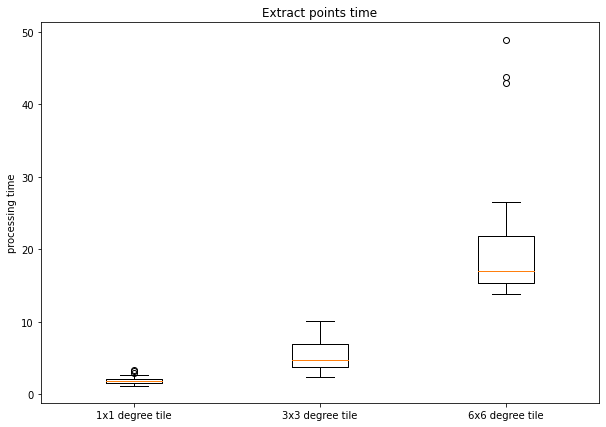

In [52]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

data = [ext_times_1,ext_times_3,ext_times_6]

# x-axis labels
ax.set_xticklabels(['1x1 degree tile','3x3 degree tile','6x6 degree tile'])
# Creating plot
plt.boxplot(data)


plt.title("Extract points time")
ax.set_ylabel('processing time')

# show plot
plt.show()

/tmp/ipykernel_11847/3205182063.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1x1 degree tile','3x3 degree tile','6x6 degree tile'])


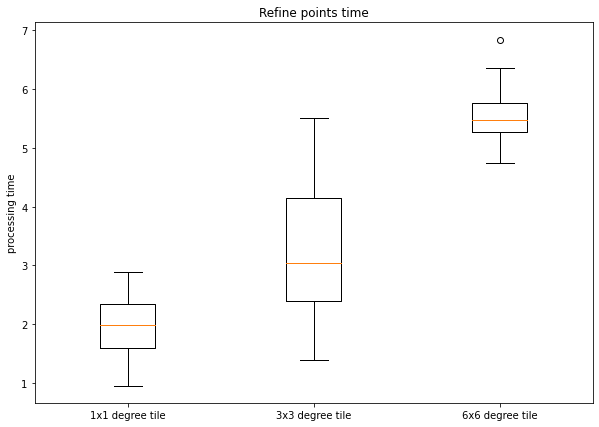

In [53]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

data = [refine_times_1,refine_times_3,refine_times_6]

# x-axis labels
ax.set_xticklabels(['1x1 degree tile','3x3 degree tile','6x6 degree tile'])
# Creating plot
plt.boxplot(data)


plt.title("Refine points time")
ax.set_ylabel('processing time')

# show plot
plt.show()

## 1x1 degree vs latlon

In [21]:
def timer_lat_lon(geometry):
    import os
    import polars as pl
    import time
    os.environ['USE_PYGEOS'] = '0'
    from pyarrow.dataset import dataset,field,parquet_dataset
    from s3fs import S3FileSystem
    import pyarrow.fs as fs
    import pyarrow.parquet as pq
    httpfs = S3FileSystem(
          endpoint_url='https://s3.eu-central-1.wasabisys.com',
          anon=True
       )
    aoi = gpd.GeoDataFrame({'geometry': [geometry]}, crs='EPSG:4326')
    object_path = f'gedi-ard/lat_lon'
    pyarrow_dataset = dataset(
        source = object_path,
        format = 'parquet',
        filesystem=httpfs
    )
    start = time.time()
    xmin,ymin,xmax,ymax = geometry.bounds
    t = pq.ParquetDataset(path_or_paths=object_path,
                          filesystem=httpfs,
                          filters=[('lat','>',ymin-1),('lat','<',ymax-1),('lon','>',xmin),('lon','<',xmax)])
    raw=t.read().to_pandas()

    print(f"extract points in {time.time() - start:.2f} s", flush=True)
    ext_time = (time.time() - start)
    print(f'number of points extracted: {len(raw)}', flush=True)
    start1 = time.time()
    gdf = gpd.GeoDataFrame(
        raw, geometry=gpd.points_from_xy(raw.longitude, raw.latitude), crs="EPSG:4326"
    )
    #gdf[['latitude','longitude','geometry']].to_file(f'{partition}.gpkg',Driver='GPKG')
    out_gdf = gpd.overlay(gdf, aoi, how='intersection')
    refine_time = (time.time() - start1)
    #print(out_gdf)
    #out_gdf[['latitude','longitude','geometry']].to_file(f'{partition}_cut.gpkg',Driver='GPKG')
    print(f"refine points in {time.time() - start1:.2f} s", flush=True)    
    print(f'number of points refined: {len(out_gdf)}', flush=True)
    print(f"total time in {time.time() - start:.2f} s", flush=True)    
    total_time = (time.time() - start)
    return ext_time, refine_time, total_time

In [26]:
ext_times_lat_lon=[]
refine_times_lat_lon=[]
total_times_lat_lon=[]
for i in range(30):
    rand_point = Point(random.uniform(12,18),random.uniform(6,12))
    geometry = rand_point.buffer(1)
    ext_time, refine_time, total_time = timer_lat_lon(geometry)
    ext_times_lat_lon.append(ext_time)
    refine_times_lat_lon.append(refine_time)
    total_times_lat_lon.append(total_time)

extract points in 2.45 s
number of points extracted: 889244
refine points in 2.07 s
number of points refined: 416787
total time in 4.52 s
extract points in 1.00 s
number of points extracted: 341988
refine points in 1.23 s
number of points refined: 221239
total time in 2.23 s
extract points in 1.46 s
number of points extracted: 722683
refine points in 1.17 s
number of points refined: 181624
total time in 2.63 s
extract points in 1.94 s
number of points extracted: 889244
refine points in 1.37 s
number of points refined: 232641
total time in 3.31 s
extract points in 1.34 s
number of points extracted: 594503
refine points in 1.10 s
number of points refined: 214183
total time in 2.44 s
extract points in 0.96 s
number of points extracted: 445033
refine points in 0.93 s
number of points refined: 194664
total time in 1.89 s
extract points in 2.51 s
number of points extracted: 643732
refine points in 1.77 s
number of points refined: 398242
total time in 4.28 s
extract points in 1.09 s
number of

/tmp/ipykernel_11950/4225450490.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1x1 degree tile','lat lon partition'])


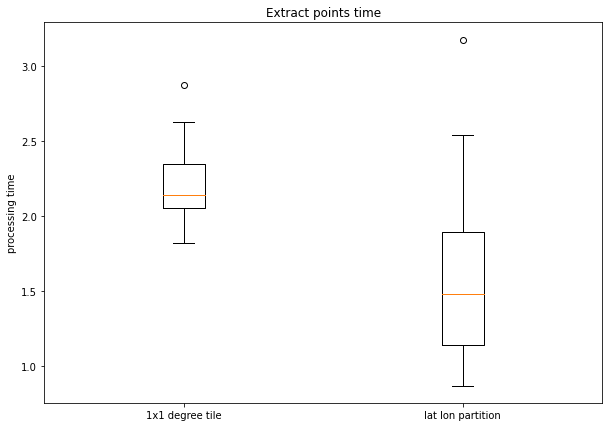

In [27]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

data = [ext_times_1,ext_times_lat_lon]

# x-axis labels
ax.set_xticklabels(['1x1 degree tile','lat lon partition'])
# Creating plot
plt.boxplot(data)


plt.title("Extract points time")
ax.set_ylabel('processing time')

# show plot
plt.show()

/tmp/ipykernel_11950/4199344254.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1x1 degree tile','lat lon partition'])


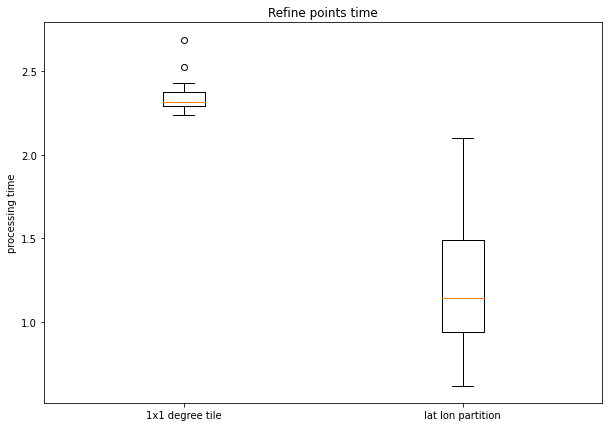

In [28]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

data = [refine_times_1,refine_times_lat_lon]

# x-axis labels
ax.set_xticklabels(['1x1 degree tile','lat lon partition'])
# Creating plot
plt.boxplot(data)


plt.title("Refine points time")
ax.set_ylabel('processing time')

# show plot
plt.show()